<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/New20_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome speech

Well Dave, you have been doing well this days in NLP and we are proud of you. Your next project now is to bulid a deep learning model that would be used to review news post a classify them according to  the classes the belong to 

## About the dataset
> You will be using the NEW20 dataset from kaggle which contains 20 different classes.

Note: This model would be deploy in the wild so at least 90% accuracy would be much more appreciated.


```
GOOD LUCK
```

In [ ]:
# Importing the useful liabaries and dataset
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups


In [ ]:
news_data= fetch_20newsgroups(subset= "all", random_state=42)

In [ ]:
news_data

{'data': ["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
  'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubjec

In [ ]:
news_data.target

array([10,  3, 17, ...,  3,  1,  7])

In [ ]:
news_data.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [ ]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
b= news_data.target_names[news_data.target[5]]
b

'sci.electronics'

In [ ]:
# Let convert it into a pandas df
df= pd.DataFrame({"sentence": news_data.data,
                  "target": news_data.target,
                  })

In [ ]:
df

,sentence,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4
...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,12
18843,From: westes@netcom.com (Will Estes)\nSubject:...,3
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [ ]:
# let split our data into train_and text
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(df,)

train_data.shape, test_data.shape

((14134, 2), (4712, 2))

In [ ]:
train_data.head()

,sentence,target
14798,From: rws2v@uvacs.cs.Virginia.EDU (Richard Sto...,1
7102,From: rwirthli@nyx.cs.du.edu (Ralph Wirthlin)\...,11
8903,From: schneier@chinet.chi.il.us (Bruce Schneie...,11
11510,From: pmw0@ns1.cc.lehigh.edu (PHILLIP MICHAEL ...,2
14530,From: jfurr@nyx.cs.du.edu (Joel Furr)\nSubject...,17


In [ ]:
# Creating train_sentence
train_sentence= train_data.sentence.to_list()
test_sentence= test_data.sentence.to_list()
train_sentence

['From: rws2v@uvacs.cs.Virginia.EDU (Richard Stoakley)\nSubject: 3D modelers for UNIX\nKeywords: 3D, three-D, modelers\nOrganization: University of Virginia Computer Science Department\nLines: 7\n\nCould someone please post a list of good three-D modelers that will\nrun on SPARC stations; preferably cheap.  Thanks\n\nRichard\nrws2v@virginia.edu\n\n\n',
 'From: rwirthli@nyx.cs.du.edu (Ralph Wirthlin)\nSubject: Re: Is it illegal to transmit encrypted data?\nOrganization: University of Denver, Dept. of Math & Comp. Sci.\nLines: 20\n\nsteve-b@access.digex.com (Steve Brinich) writes:\n\n\n> > I\'m afraid I have to disagree with you on that point.  NSA will *not*\n> >tell RSA or any other non-DOD entity anything that its eavesdropping\n> >reveals.\n\n>  I don\'t know about that; they might if they find it the most expedient\n>way to keep people from using something they can\'t crack.\n\nLet\'s put it this way, they have a charter and several executive orders\nto obey, among other things whic

In [ ]:
# let view randon sentence
import random

random_sentence= random.choice(train_sentence)
random_sentence

"From: csulo@csv.warwick.ac.uk (Mr M J Brown)\nSubject: Re: solvent for duct-tape adhesive?\nOrganization: Computing Services, University of Warwick, UK\nLines: 24\nNNTP-Posting-Host: clover.csv.warwick.ac.uk\n\nIn article <1993Apr26.235820.10742@mnemosyne.cs.du.edu> gvolk@nyx.cs.du.edu (Greg Volk) writes:\n>What I usually use...and this stuff is only good on glass....is either Acetone,\n>or a little Benzene. The latter of the two is a bit dangerous (possibly a \n                                                ^^^^^^^^^^^^^^^  ^^^^^\n>carcinogen(sp?)) but it usualy gets the job done. I imagine you can you the two\n  ^^^^^^^^\n>solvents on most metals as well as glass, but keep the stuff away from plastic.\n\nBenzene is most definitely a carcinogen. If you can get your hands on it\n\n* Don't use it! *\n\n=============================================================================  \n     _/      _/   _/   _/  _/   _/_/_/_/   |\n    _/_/  _/_/   _/   _/_/     _/          |         Micha

### Preprocessing our lable


In [ ]:
train_data.head()

,sentence,target
14798,From: rws2v@uvacs.cs.Virginia.EDU (Richard Sto...,1
7102,From: rwirthli@nyx.cs.du.edu (Ralph Wirthlin)\...,11
8903,From: schneier@chinet.chi.il.us (Bruce Schneie...,11
11510,From: pmw0@ns1.cc.lehigh.edu (PHILLIP MICHAEL ...,2
14530,From: jfurr@nyx.cs.du.edu (Joel Furr)\nSubject...,17


In [ ]:
train_labels= train_data.target
test_labels= test_data.target
train_labels

14798     1
7102     11
8903     11
11510     2
14530    17
         ..
17674    16
18160    18
11170    11
5305      7
16541     8
Name: target, Length: 14134, dtype: int64

In [ ]:
test_labels

12715     4
419      15
12485     2
12764    19
13030    15
         ..
15319    14
14977     0
10022    13
979       8
15387    14
Name: target, Length: 4712, dtype: int64

In [ ]:
train_data.target.value_counts()

7     781
13    756
5     755
8     753
9     752
11    749
15    746
10    741
1     734
6     728
4     726
2     722
12    719
3     717
14    713
17    692
16    673
0     616
18    587
19    474
Name: target, dtype: int64

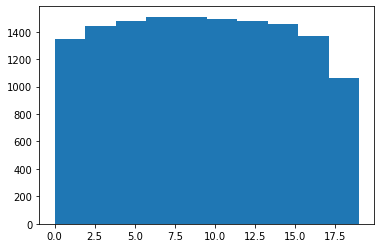

In [ ]:
# Let check the distribution
plt.hist(train_data.target, bins=10);

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encode= OneHotEncoder(sparse=False)

train_label_one_hot= one_hot_encode.fit_transform(train_data.target.to_numpy().reshape(-1, 1))
test_label_one_hot= one_hot_encode.transform(test_data.target.to_numpy().reshape(-1, 1))

train_label_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_label_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model_0: Baseline model 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
baseline_model= Pipeline([
    ("tfid", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Let fit our model

baseline_model.fit(train_sentence,
                   train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Let evalute out model
baseline_model.score(train_sentence, 
                     train_labels)

0.9300976369039197

Wow, 93% on our traning data, let see how it will go on our test data

In [ ]:
baseline_model.score(test_sentence,
                     test_labels)

0.8525042444821732

In [ ]:
# Let make predictions on our test data
baseline_preds= baseline_model.predict(test_sentence)
baseline_preds

array([11, 15,  3, ..., 13,  8, 14])

In [ ]:
test_labels

12715     4
419      15
12485     2
12764    19
13030    15
         ..
15319    14
14977     0
10022    13
979       8
15387    14
Name: target, Length: 4712, dtype: int64

## Creating evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Takes in true lables and predicted label 
  and returns a dictinary contaning the model 
  accuracy,
  precision
  recall
  and F1 score
  """

  model_accuracy= accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred,average="weighted")
  results= {"Accuracy": model_accuracy,
            "Precision": model_precision,
            "Recall": model_recall,
            "F1_score": model_f1_score}

  return results

In [ ]:
# Let calculate our model
baseline_results= calculate_results(test_labels,
                                    baseline_preds)

baseline_results

{'Accuracy': 85.25042444821732,
 'Precision': 0.8724995245935646,
 'Recall': 0.8525042444821732,
 'F1_score': 0.8467995825294815}

### Baseline model round speech


Well, our baseline model did a very nice job with 

* Accuracy 85%
* Precision 87%
* Recall 85%
* f1_score 84%

Preprocessing our data for deel learning algorithm

In [ ]:
total_sentence= [len(sentence.split()) for sentence in train_sentence]
mean_sentence= np.mean(total_sentence)
max_sentence= np.max(total_sentence)

print(f"Mean sentence: {mean_sentence}")
print(f"Maximum sentence: {max_sentence}")

Mean sentence: 284.5054478562332
Maximum sentence: 11821


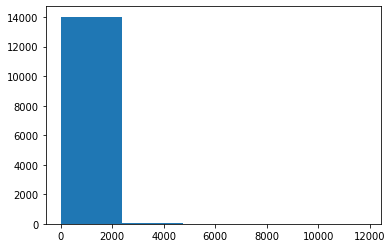

In [ ]:
# Let check our sentence lenght distribution
plt.hist(total_sentence, bins=5);

In [ ]:
np.max(total_sentence)

11821

In [ ]:
# Let calculate the 96% percentile of our data
output_seq_lenght= int(np.percentile(total_sentence, 90))
output_seq_lenght

506

In [ ]:
# Let calculate the total words we have in our sentence
total_words = [len(sentence.split()) for sentence in train_sentence]
total_word_sum= np.sum(total_words)
total_word_sum

4021200

In [ ]:
max_token= int(total_word_sum * 0.45)
max_token

1809540

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
text_vectorizer= TextVectorization(max_tokens= max_token,
                                   output_sequence_length= output_seq_lenght,
                                   name= "Text_vectorizer_layer")

# Let Adapt our traning sentence to our text_vectorizer layer
text_vectorizer.adapt(train_sentence)

In [ ]:
# Let test our text vectorizer layer on o ransom sentence
import random 

random_sentence= random.choice(train_sentence)
# Let pass it into our text vectorizer layer
random_sen_token= text_vectorizer([random_sentence])

print(f"Random sentence before passing it into our text vectorizer layer:\n{random_sentence}\n")
print(f"Lenght of random sentence: {len(random_sentence.split())}\n")
print(f"Random sentence after passing it into our text vectorizer layer:\n {random_sen_token}\n")
print(f"Shape of random sentence after passinf through our text_vectorizer layer {random_sen_token.shape} ")

Random sentence before passing it into our text vectorizer layer:
From: gruncie@cs.strath.ac.uk (Gillian E Runcie CS92)
Subject: Re: Fortune-guzzler barred from bars!
Organization: Comp. Sci. Dept., Strathclyde Univ., Glasgow, Scotland.
Lines: 2
NNTP-Posting-Host: lister-06.cs.strath.ac.uk

that's okay, he's perfectly welcome to come to Scotland you know ;-)



Lenght of random sentence: 36

Random sentence after passing it into our text vectorizer layer:
 [[    14  62761  27743    444  41747  37802     27     44  22601  13002
      14   4765     30   2567   1980    504  26245   1000   9417  10691
      29     86     77 113190    207   1849    609   2322   1645      3
     219      3  10691     13     72      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      

In [ ]:
words_in_vocab= text_vectorizer.get_vocabulary()
print(f"Total words in our vocabulary: {len(words_in_vocab)}")
print(f"Ten most common words: {words_in_vocab[:10]}")
print(f"Ten list most common words in our vocab {words_in_vocab[-10:]} ")

Total words in our vocabulary: 155137
Ten most common words: ['', '[UNK]', 'the', 'to', 'of', 'a', 'and', 'in', 'is', 'i']
Ten list most common words in our vocab ['\x1b34mand', '\x1b32mby', '\x1a', '\x19', '\x10where', '\x10more', '\x08d\x08i\x08s\x08c\x08l\x08a\x08i\x08m\x08e\x08r\x08', '\x08', '\x03', '\x02ubject'] 


### Creating text embeddinds

In [ ]:
from tensorflow.keras.layers import Embedding

text_embeddings= Embedding(input_dim= len(words_in_vocab),
                           output_dim= 128,
                           name="embedding_layer")

In [ ]:
# Let text our embedding layer on a random sentence

import random 

random_sentence= random.choice(train_sentence)
# Let pass it into our text vectorizer layer
random_sen_token= text_vectorizer([random_sentence])
# Let pass it into our embedding layers
random_sen_embed= text_embeddings(random_sen_token)

print(f"Random sentence before passing it into our text vectorizer layer:\n{random_sentence}\n")
print(f"Random sentence after passing it into our Embedding layer:\n {random_sen_embed}\n")
print(f"Shape of random sentence after passing through our Embedding layer {random_sen_embed.shape} ")

Random sentence before passing it into our text vectorizer layer:
From: eshneken@ux4.cso.uiuc.edu (Edward A Shnekendorf)
Subject: Airline ticket: Washington DC -> Champaign, IL (FOR SALE)
Organization: University of Illinois at Urbana
Lines: 9


I am selling a one way ticket from Washington DC to Champaign, IL ( the
home of the University of Illinois).  Am willing to offer a good price.

If you are interested, please email me at:  eshneken@uiuc.edu

Thanks,
Ed.



Random sentence after passing it into our Embedding layer:
 [[[ 1.08491555e-02  4.35948707e-02 -6.76519796e-03 ...  2.00958736e-02
    3.60507630e-02  1.84607841e-02]
  [ 2.19674744e-02 -4.27914038e-02 -4.55377586e-02 ... -4.67169285e-02
   -3.65760922e-02  4.08446305e-02]
  [ 5.13590872e-04 -3.57736461e-02 -6.93617016e-03 ...  2.94223428e-05
    2.16344111e-02  4.77738865e-02]
  ...
  [-2.33980268e-03 -4.98831756e-02  4.74244617e-02 ...  7.14397430e-03
   -2.56698485e-02 -2.25177296e-02]
  [-2.33980268e-03 -4.98831756e-02  4

## Creating tensorflow dataset

In [ ]:
tf_train_data= tf.data.Dataset.from_tensor_slices((train_sentence, train_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
tf_test_data= tf.data.Dataset.from_tensor_slices((test_sentence, test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

print(tf_train_data)
print(tf_test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 20), dtype=tf.float64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 20), dtype=tf.float64, name=None))>


## Model_1: Conv1D

In [ ]:
from  tensorflow.keras import layers

In [ ]:
num_of_classes =len(news_data.target_names)
num_of_classes

20

In [ ]:
input_layer= layers.Input(shape=(1, ), dtype=tf.string, name="input_layer")
vectorizer_layer= text_vectorizer(input_layer)
embedding_layer= text_embeddings(vectorizer_layer)
x= layers.Conv1D(64, 5, activation="relu")(embedding_layer)
x= layers.Conv1D(64, 5, activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)
x= layers.Dense(64, activation="relu")(x)
output_layer= layers.Dense(num_of_classes, activation="softmax", name="output_layer")(x)

model_1= tf.keras.Model(inputs= input_layer,
                        outputs= output_layer)

In [ ]:
# Let get a summary of our model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 Text_vectorizer_layer (Text  (None, 506)              0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding)  (None, 506, 128)         19857536  
                                                                 
 conv1d (Conv1D)             (None, 502, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                              

In [ ]:
# Let compile our model
model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
int(0.5* len(tf_train_data))

221

In [ ]:
int(0.5* len(tf_train_data)) * 5

1105

In [ ]:
# Let fit our model
history_model_1= model_1.fit(tf_train_data,
                             epochs=5,
                             steps_per_epoch= len(tf_train_data),
                             validation_data= tf_test_data,
                             validation_steps= len(tf_test_data))

Epoch 1/5
442/442 [==============================] - 32s 24ms/step - loss: 1.9302 - accuracy: 0.4198 - val_loss: 0.7591 - val_accuracy: 0.7708
Epoch 2/5
442/442 [==============================] - 9s 20ms/step - loss: 0.3146 - accuracy: 0.9109 - val_loss: 0.4407 - val_accuracy: 0.8795
Epoch 3/5
442/442 [==============================] - 10s 22ms/step - loss: 0.0426 - accuracy: 0.9900 - val_loss: 0.4350 - val_accuracy: 0.8890
Epoch 4/5
442/442 [==============================] - 10s 24ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.4846 - val_accuracy: 0.8867
Epoch 5/5
442/442 [==============================] - 10s 23ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.4560 - val_accuracy: 0.8973


In [ ]:
# Let evaluate on the whole test data
model_1.evaluate(tf_test_data)

148/148 [==============================] - 1s 8ms/step - loss: 0.4560 - accuracy: 0.8973


[0.4559757113456726, 0.8972835540771484]

In [ ]:
history_1= pd.DataFrame(history_model_1.history)
history_1

,loss,accuracy,val_loss,val_accuracy
0,1.930203,0.419839,0.759127,0.770798
1,0.314552,0.910924,0.440674,0.879457
2,0.042625,0.990024,0.435028,0.889007
3,0.008772,0.998302,0.484621,0.886672
4,0.004308,0.999080,0.455976,0.897284


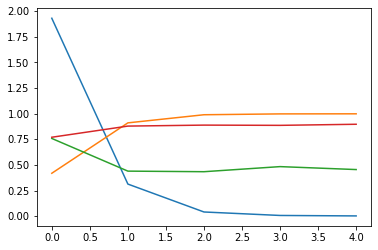

In [ ]:
# Let plot our models loss curve
plt.plot(history_1);

In [ ]:
# Let make predictions with our model
model_1_pred_probs= model_1.predict(tf_test_data)
model_1_pred_probs

array([[1.0321009e-17, 1.0860397e-06, 2.0780451e-09, ..., 4.5888213e-14,
        2.1486132e-18, 3.3598138e-19],
       [8.2248768e-08, 1.5476251e-14, 4.1432299e-11, ..., 1.0065643e-12,
        1.1837537e-08, 1.8211102e-04],
       [9.9939994e-14, 2.3435867e-05, 6.8451941e-01, ..., 2.9118741e-09,
        3.4302542e-07, 8.1960607e-09],
       ...,
       [2.1826995e-03, 5.2922695e-07, 1.0746542e-08, ..., 4.7303220e-05,
        8.5632834e-09, 1.1536194e-05],
       [1.0676304e-09, 3.4025106e-11, 3.9710304e-08, ..., 1.2780353e-16,
        3.1993216e-07, 8.0899190e-05],
       [1.4480895e-03, 6.0792229e-07, 5.2978453e-06, ..., 5.9586014e-08,
        1.5516388e-03, 7.8375265e-03]], dtype=float32)

In [ ]:
# Let convert our prediction probability into preds
model_1_preds= tf.argmax(model_1_pred_probs, axis= 1)
model_1_preds

<tf.Tensor: shape=(4712,), dtype=int64, numpy=array([ 4, 15,  2, ..., 13,  8, 14])>

In [ ]:
test_labels

12715     4
419      15
12485     2
12764    19
13030    15
         ..
15319    14
14977     0
10022    13
979       8
15387    14
Name: target, Length: 4712, dtype: int64

In [ ]:
# Let calculate our model result
model_1_result= calculate_results(test_labels,
                                  model_1_preds)

model_1_result

{'Accuracy': 89.72835314091681,
 'Precision': 0.8994007149042559,
 'Recall': 0.8972835314091681,
 'F1_score': 0.8977774119525949}

In [ ]:
baseline_results

{'Accuracy': 85.25042444821732,
 'Precision': 0.8724995245935646,
 'Recall': 0.8525042444821732,
 'F1_score': 0.8467995825294815}

### Model_2: Feature extraction model

We would be using the univesal sentence encoder which is a pretrained model from tensorflow hub

In [ ]:
import tensorflow_hub as hub

universal_sentence_encoder= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                           trainable=False,
                                           name="Univesal_sentence_encoder")

universal_sentence_encoder

In [ ]:
# let try our unversal sentence encoder on a random sentence
import random 

random_sentence= random.choice(train_sentence)
# Let pass it into our text vectorizer layer
random_sen_use= universal_sentence_encoder([random_sentence])

print(f"Random sentence before passing it into our text vectorizer layer:\n{random_sentence}\n")
print(f"Lenght of random sentence: {len(random_sentence.split())}\n")
print(f"Random sentence after passing it into our text vectorizer layer:\n {random_sen_use}\n")
print(f"Shape of random sentence after passinf through our text_vectorizer layer {random_sen_use.shape} ")


Random sentence before passing it into our text vectorizer layer:
From: Mike Diack <mike-d@staff.tc.umn.edu>
Subject: Re: Electronic Components etc
X-Xxmessage-Id: <A7FD05D0F6016515@dialup-slip-1-21.gw.umn.edu>
X-Xxdate: Fri, 23 Apr 93 02:32:48 GMT
Nntp-Posting-Host: dialup-slip-1-21.gw.umn.edu
Organization: persian cat & carpet co.
X-Useragent: Nuntius v1.1.1d7
Lines: 19

I said
>Cipher tape drives				$10.00 
what a SILLY boy i was, now i have zillions of messages like
"does that include shipping" 		
"is it scsi"
"what rom version is it"
"will it work on a maximegalon gargantuabrain 9000"
ok, the deal is this - if you live in the twin cities, email me, and set
up a time, sure, you can drop round and grab one for a tenner.
Else
Min order $20 (2 drives) + shipping. No guarantees they are good for
any purpose at all (they look newish & clean), no technical
negotiations. They are model 525 floppytape, part # 960273-639
revision D. 17 pin floppy style connector on the back
Else
They go in 

### Model_3

In [ ]:
input= layers.Input(shape=[], dtype="string", name="USE_input_layer")
use_layer= universal_sentence_encoder(input)
x= layers.Dense(128, activation="relu")(use_layer)
x= layers.Dense(128, activation="relu")(x)
use_output= layers.Dense(num_of_classes, activation="softmax")(x)
model_2= tf.keras.Model(inputs= input,
                        outputs= use_output)

In [ ]:
# Let get the summary of our model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_input_layer (InputLayer  [(None,)]                0         
 )                                                               
                                                                 
 Univesal_sentence_encoder (  (None, 512)              256797824 
 KerasLayer)                                                     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 20)                2580      
                                                                 
Total params: 256,882,580
Trainable params: 84,756
Non-trai

In [ ]:
# Let compile our model
model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Let fit our model
history_model_2= model_2.fit(tf_train_data,
                             epochs=5,
                             steps_per_epoch= len(tf_train_data),
                             validation_data= tf_test_data,
                             validation_steps= len(tf_test_data))

Epoch 1/5
442/442 [==============================] - 50s 106ms/step - loss: 1.3258 - accuracy: 0.6150 - val_loss: 0.8635 - val_accuracy: 0.7203
Epoch 2/5
442/442 [==============================] - 51s 116ms/step - loss: 0.7314 - accuracy: 0.7606 - val_loss: 0.7760 - val_accuracy: 0.7468
Epoch 3/5
442/442 [==============================] - 46s 104ms/step - loss: 0.6421 - accuracy: 0.7896 - val_loss: 0.7500 - val_accuracy: 0.7572
Epoch 4/5
442/442 [==============================] - 46s 104ms/step - loss: 0.5890 - accuracy: 0.8066 - val_loss: 0.7405 - val_accuracy: 0.7615
Epoch 5/5
442/442 [==============================] - 46s 103ms/step - loss: 0.5500 - accuracy: 0.8192 - val_loss: 0.7388 - val_accuracy: 0.7657


In [ ]:
# Let evaluate our model
model_2.evaluate(tf_test_data)

148/148 [==============================] - 12s 79ms/step - loss: 0.7388 - accuracy: 0.7657


[0.738834798336029, 0.7657045722007751]

In [ ]:
# Let male prediction with our model
model_2_pred_probs= model_2.predict(tf_test_data)
model_2_pred_probs

array([[2.1362745e-05, 1.5656334e-01, 5.9871573e-04, ..., 5.9431991e-06,
        7.2933803e-06, 2.7613640e-05],
       [5.6450989e-02, 2.0805110e-05, 1.0172952e-06, ..., 1.3031081e-05,
        3.1213096e-04, 3.4943692e-02],
       [4.3869619e-05, 7.0863962e-01, 1.7435807e-01, ..., 1.5790758e-05,
        3.9349438e-06, 4.8524616e-05],
       ...,
       [4.6506776e-03, 3.7800494e-04, 6.9662237e-05, ..., 2.8623332e-04,
        1.0794152e-02, 3.9942344e-03],
       [3.1592089e-03, 1.4979830e-05, 2.3199565e-04, ..., 7.2903553e-05,
        2.1164874e-03, 2.9851487e-03],
       [1.5608193e-03, 9.3089780e-05, 1.3480609e-05, ..., 2.6843729e-05,
        3.8331097e-03, 1.3792651e-02]], dtype=float32)

In [ ]:
# let convert our prediction probabilities into prediction
model_2_preds= tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(4712,), dtype=int64, numpy=array([ 4, 15,  1, ..., 13,  8, 14])>

In [ ]:
test_labels

12715     4
419      15
12485     2
12764    19
13030    15
         ..
15319    14
14977     0
10022    13
979       8
15387    14
Name: target, Length: 4712, dtype: int64

In [ ]:
# Let calculate our models prediction
model_2_results= calculate_results(y_true= test_labels,
                                   y_pred= model_2_preds)


model_2_results

{'Accuracy': 76.5704584040747,
 'Precision': 0.7699623052443709,
 'Recall': 0.765704584040747,
 'F1_score': 0.7643295118504422}

### Model_3: Bert

In [ ]:
import tensorflow

### Finding the best model

In [ ]:
baseline_results

{'Accuracy': 85.25042444821732,
 'Precision': 0.8724995245935646,
 'Recall': 0.8525042444821732,
 'F1_score': 0.8467995825294815}

In [ ]:
model_1_result

{'Accuracy': 89.72835314091681,
 'Precision': 0.8994007149042559,
 'Recall': 0.8972835314091681,
 'F1_score': 0.8977774119525949}

In [ ]:
model_2_results

{'Accuracy': 76.5704584040747,
 'Precision': 0.7699623052443709,
 'Recall': 0.765704584040747,
 'F1_score': 0.7643295118504422}

In [ ]:
all_model_results= pd.DataFrame({"baseline": baseline_results,
                                 "model_1_conv1D": model_1_result,
                                 "model_2_USE": model_2_results})

all_model_results= all_model_results.T
all_model_results

,Accuracy,Precision,Recall,F1_score
baseline,85.250424,0.872500,0.852504,0.846800
model_1_conv1D,89.728353,0.899401,0.897284,0.897777
model_2_USE,76.570458,0.769962,0.765705,0.764330


In [ ]:
# Let rescall our accracy
all_model_results["Accuracy"]= all_model_results["Accuracy"]/100
all_model_results

,Accuracy,Precision,Recall,F1_score
baseline,0.852504,0.872500,0.852504,0.846800
model_1_conv1D,0.897284,0.899401,0.897284,0.897777
model_2_USE,0.765705,0.769962,0.765705,0.764330


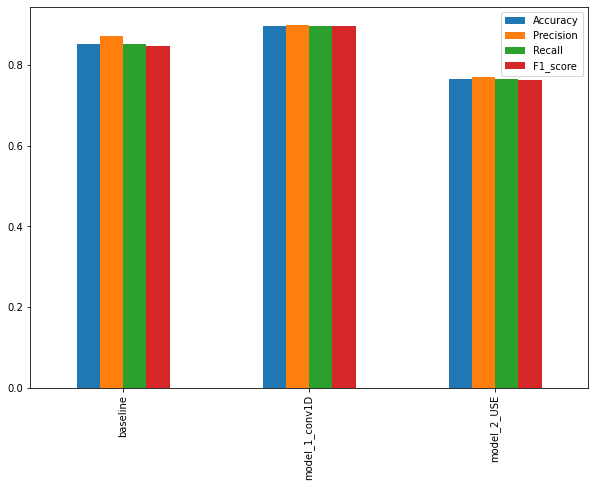

In [ ]:
# let have a more visual
all_model_results.plot(kind="bar", figsize= (10, 7))

Well,  with what we can see from our graph, we can see that our conv1D model out performe both the universal sentence encoder and our baseline model. 

### Loading and Saving the best model

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 Text_vectorizer_layer (Text  (None, 506)              0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding)  (None, 506, 128)         19857536  
                                                                 
 conv1d (Conv1D)             (None, 502, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                              

In [ ]:
# # Let save our model
# tf.keras.models.save_model(model_1, "drive/MyDrive/news_20_conv1D_model")

In [ ]:
# Let load back our model

loaded_model= tf.keras.models.load_model("drive/MyDrive/news_20_conv1D_model")
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 Text_vectorizer_layer (Text  (None, 506)              0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding)  (None, 506, 128)         19857536  
                                                                 
 conv1d (Conv1D)             (None, 502, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                              

In [ ]:
# Let make predictions on our test data
loaded_model_pred_probs= loaded_model.predict(tf_test_data)
loaded_model_pred_probs

array([[1.0321009e-17, 1.0860397e-06, 2.0780451e-09, ..., 4.5888213e-14,
        2.1486132e-18, 3.3598138e-19],
       [8.2248768e-08, 1.5476251e-14, 4.1432299e-11, ..., 1.0065643e-12,
        1.1837537e-08, 1.8211102e-04],
       [9.9939994e-14, 2.3435867e-05, 6.8451941e-01, ..., 2.9118741e-09,
        3.4302542e-07, 8.1960607e-09],
       ...,
       [2.1826995e-03, 5.2922695e-07, 1.0746542e-08, ..., 4.7303220e-05,
        8.5632834e-09, 1.1536194e-05],
       [1.0676304e-09, 3.4025106e-11, 3.9710304e-08, ..., 1.2780353e-16,
        3.1993216e-07, 8.0899190e-05],
       [1.4480895e-03, 6.0792229e-07, 5.2978453e-06, ..., 5.9586014e-08,
        1.5516388e-03, 7.8375265e-03]], dtype=float32)

## Making predictions and evalating our loaded model

In [ ]:
loaded_model_pred= tf.argmax(loaded_model_pred_probs, axis= 1)
loaded_model_pred

<tf.Tensor: shape=(4712,), dtype=int64, numpy=array([ 4, 15,  2, ..., 13,  8, 14])>

In [ ]:
# Let calculate our model result
loaded_model_results= calculate_results(test_labels,
                                        loaded_model_pred)

loaded_model_results

{'Accuracy': 89.72835314091681,
 'Precision': 0.8994007149042559,
 'Recall': 0.8972835314091681,
 'F1_score': 0.8977774119525949}

In [ ]:
model_1_result

{'Accuracy': 89.72835314091681,
 'Precision': 0.8994007149042559,
 'Recall': 0.8972835314091681,
 'F1_score': 0.8977774119525949}